In [87]:
model = core.Model.load(r'C:\Users\Khuzaima Aziz\Downloads\ds_task_3-master\ds_task_3\training\model_weights.pth', ['Memory'])

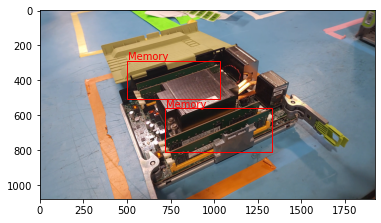

In [89]:
image = utils.read_image(r'C:\Users\Khuzaima Aziz\Downloads\ds_task_3-master\ds_task_3\training\memory\Test\out18.png') 
predictions = model.predict(image)
labels, boxes, scores = predictions
thresh=0.8
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)

In [92]:
import io
from PIL import Image
from flask import Flask, request

app = Flask(__name__)

@app.route("/objectdetection/", methods=["POST"])
def predict():
    if not request.method == "POST":
        return

    if request.files.get("image"):
        image_file = request.files["image"]
        image_bytes = image_file.read()
        img = Image.open(io.BytesIO(image_bytes))
        results = model.predict(img)
        labels, boxes, scores = results
        thresh=0.8
        filtered_indices=np.where(scores>thresh)
        filtered_scores=scores[filtered_indices]
        filtered_boxes=boxes[filtered_indices]
        results_json = {"boxes":filtered_boxes.tolist(),"Score":filtered_scores.tolist()}
        return {"results":results_json}


app.run(host="0.0.0.0", port=8000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.18.244:8000/ (Press CTRL+C to quit)
192.168.18.244 - - [06/Apr/2023 00:51:09] "POST /objectdetection/ HTTP/1.1" 200 -
192.168.18.244 - - [06/Apr/2023 00:51:48] "POST /objectdetection/ HTTP/1.1" 200 -
